# How to Automate Data Visualization with AI <a id="make-a-data-visualization-agent"></a>

In this tutorial, you will learn how to automate data visualization with AI. We will create a Data Visualization Agent that uses the `plotly` library to create interactive visualizations from Natural Language.

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


# Table of Contents

1. [How to Automate Data Visualization with AI](#make-a-data-visualization-agent)
2. [Load Libraries](#load-libraries)
3. [Setup AI and Logging](#setup-ai-and-logging)
4. [Load a Dataset](#load-a-dataset)
5. [Create The Agent](#create-the-agent)
6. [Response](#response)
7. [The data visualization](#the-data-visualization)
8. [Data Visualization Function](#data-visualization-function)
9.  [Free Generative AI Data Science Workshop](#free-generative-ai-data-science-workshop)

### Load Libraries <a id="load-libraries"></a>

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI
import os
import yaml
import pandas as pd
from pprint import pprint

from ai_data_science_team.agents import DataVisualizationAgent
from ai_data_science_team.utils.plotly import plotly_from_dict

### Setup AI and Logging <a id="setup-ai-and-logging"></a>

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x7fd9f8f61a50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x7fda287706a0>, root_client=<openai.OpenAI object at 0x7fd9f8f16a70>, root_async_client=<openai.AsyncOpenAI object at 0x7fd9f8f619c0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Load a Dataset <a id="load-a-dataset"></a>

Next, let's load a customer churn data set that we will clean up. 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent <a id="create-the-agent"></a>

Run this code to create an agent with `DataVisualizationAgent()`.

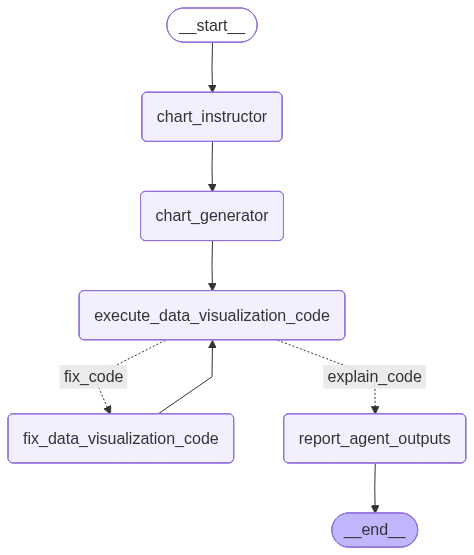

In [4]:
data_visualization_agent = DataVisualizationAgent(
    model = llm,
    log = LOG,
    log_path = LOG_PATH
)

data_visualization_agent

This creates an `app`, which is a langgraph agent with the main inputs:

- **user_instructions**: The data cleaning agent will use these comments to modify the "standard recipe" 
  - Standard Recipe: The standard cleaning recipe which includes removing columns with more than 40% missing values, imputing missing values using mean (numeric) or mode (categorical), removing duplicate rows, and removing outliers. 
- **data_raw**: The raw data to be cleaned
- **max_retries**: Used to limit the number of attempts to fix the python code generated by the agent. Set this to 3 to limit to 3 attempts. 
- **retry_count**: Set this to 0. 

In [5]:

data_visualization_agent.invoke_agent(
    data_raw=df, 
    user_instructions="Make a boxplot of the monthly charges vs Churn. Churn should be on X axis and distribution on Y axis.",
    max_retries=3,
    retry_count=0,
)

---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/data_visualization.py
    * EXECUTE DATA VISUALIZATION CODE (SANDBOXED)
    * REPORT AGENT OUTPUTS


### Response <a id="response"></a>

The response produced contains everything we need to understand the data visualization decisions made and get the plotly graph. 

In [6]:
response = data_visualization_agent.get_response()

list(response.keys())

['messages',
 'user_instructions',
 'recommended_steps',
 'data_raw',
 'plotly_graph',
 'all_datasets_summary',
 'data_visualization_function',
 'data_visualization_function_path',
 'data_visualization_function_file_name',
 'data_visualization_function_name',
 'data_visualization_error',
 'max_retries',
 'retry_count']

### The data visualization <a id="the-data-visualization"></a>

In [7]:
data_visualization_agent.get_plotly_graph()

![Boxplot](img/boxplot.jpg)

#### Data Visualization Function <a id="data-visualization-function"></a>

In [8]:
data_visualization_agent.get_data_visualization_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_visualization_agent
# Time Created: 2025-12-08 18:29:21

def data_visualization(data_raw):
    import pandas as pd
    import json
    import plotly.graph_objects as go
    import plotly.io as pio




    # Create a boxplot
    fig = go.Figure()

    fig.add_trace(go.Box(
        y=data_raw[data_raw['Churn'] == 'Yes']['MonthlyCharges'],
        name='Yes',
        boxmean='sd'  # Show the standard deviation
    ))

    fig.add_trace(go.Box(
        y=data_raw[data_raw['Churn'] == 'No']['MonthlyCharges'],
        name='No',
        boxmean='sd'  # Show the standard deviation
    ))

    # Update layout
    fig.update_layout(
        title='Monthly Charges Distribution by Churn Status',
        xaxis_title='Churn Status',
        yaxis_title='Monthly Charges',
        boxmode='group'  # Group boxes together
    )
    
    # Convert the figure to a JSON-compatible format
    fig_json = pio.to_json(fig)
    fig_dict = json.loads(fig_json)

    return fig_dict
```

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)